In [3]:
"""
ADVANCED TODO:
- write cross-validation from scratch using sklearn methods
"""

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def sklearn_KFolding(clf, X, y, cv):

    skfolds = StratifiedKFold(cv)

    for train_index, test_index in skfolds.split(X, y):
        clone_clf = clone(clf)
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]

        clone_clf.fit(X_train, y_train)
        y_pred = clone_clf.predict(X_test)
        n_correct = sum(y_pred == y_test)
        print(n_correct / len(y_pred))

In [1]:
"""
TODO ADVANCED
- load iris dataset, just as it was made before, from https://scikit-learn.org/stable/modules/classes.html#loaders
- choose few classfiers to compare
- split dataset into train/test
- calculate cross validation score for classifiers
- train classifier on train part
- plot roc curve and calculate socre for each flower type (because it`s only for binary problem you have to iterate for each flowe type)
"""

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
"""
ADVANCED TODO:
- use chosen classifier to 
"""    

from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


# #############################################################################
# Load some categories from the training set
categories = [
    'alt.atheism',
    'talk.religion.misc',
]
# Uncomment the following to do the analysis on all the categories
#categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

data = fetch_20newsgroups(subset='train', categories=categories)
print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()

# #############################################################################
# Define a pipeline combining a text feature extractor with a simple
# classifier
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    # 'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    # 'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    # 'clf__max_iter': (10, 50, 80),
}

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(data.data, data.target)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

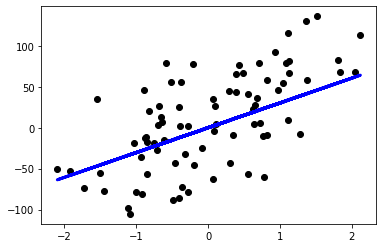

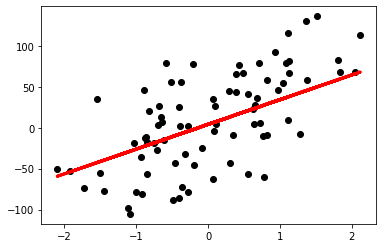

[30.3157638]
[30.21155531]


In [19]:
"""
    TODO:
    - Linear regresion from scratch
    - add regulatizations l1, l2, elastic_net regulatization
    - add l_n regularization
"""

from sklearn.linear_model import LinearRegression

import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=200, n_features=1, noise=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

class LinearRegression_(object):
    def __init__(self, n_iterations, learning_rate, add_bias=True):
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.weights = None
        self.mse_errors = []
        self.add_bias = add_bias
    
    def initialize_weights(self, weights_shape):
        """
            Weights initialization with random number in range +-1/sqrt(weights_shape)
        """
        boundary = 1/np.sqrt(weights_shape)
        return np.random.uniform(low=-boundary, high=boundary, size=(weights_shape,))
    
    def fit(self, X, y):
        """
            Method that makes MSE error and SGD regression
            MSE = mean(1/n(y - y_predicted)^2)
            
            where:
                y_predicted = w_0 + w_1*x = X.dot(w)
                
            Parameters:
            X - input data [n_samples, n_features]
            y - label data [n_samples,]
        """
        if self.add_bias:
            X = np.insert(X, 0, 1, axis=1)
        
        self.weights = self.initialize_weights(X.shape[1])

        for i in range(self.n_iterations):
             # shape = [n_samples, n_features] * [n_features,] = [n_samples,]
            y_predicted = X.dot(self.weights)
            mse = np.mean(0.5*(y - y_predicted)**2)
            self.mse_errors.append(mse)
            
            # making optimization using chain rule for mse
            # w_grad = grad(0.5*(y - X.dot(w))**2) = -(y - X.dot(w)).dot(X)
            # w_grad shape [n_features,] = 
            w_grad = -(y -y_predicted).dot(X)
            self.weights -= self.learning_rate*w_grad
    
    def predict(self, X):
         if self.add_bias:
            X = np.insert(X, 0, 1, axis=1)
        return X.dot(self.weights)
        
clf = LinearRegression_(1000, 0.001)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

sk_clf = LinearRegression()
sk_clf.fit(X_train, y_train)
y_pred_sk = sk_clf.predict(X_test)

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks()
plt.yticks()
plt.show()

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred_sk, color='red', linewidth=3)

plt.xticks()
plt.yticks()

plt.show()

print(clf.weights)
print(sk_clf.coef_)